In [22]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
#Loading the dataset
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

#Find the number of classes or categories
classes = np.unique(y_train)
nClasses = len(classes)
print("This dataset has {0:d} classes".format(nClasses))

y_name = {0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandals",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle Boot"}

print("Image size: ",x_train[0].shape)



This dataset has 10 classes
Image size:  (28, 28)


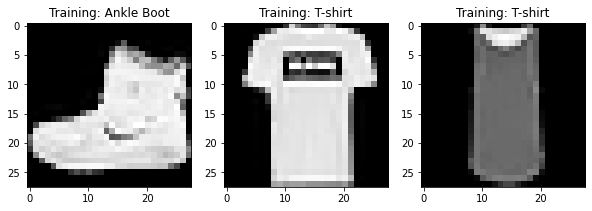

In [11]:
# Printing the dataset's samples

_, fig = plt.subplots(1,3,figsize=(10,10))

for ax, image, label in zip(fig, x_train, y_train):
    ax.set_axis_off
    ax.imshow(image, cmap=plt.cm.Greys_r)
    ax.set_title("Training: %s" %y_name[label])




In [13]:
# find the input format for the CNN

x_train_reshape = x_train.reshape((-1,28,28,1))
x_test_reshape = x_test.reshape((-1,28,28,1))

print("New data shape: (samples,width,length,channel)=",x_train_reshape.shape)

New data shape: (samples,width,length,channel)= (60000, 28, 28, 1)


In [14]:
#Changing the pixel's value format from unit8 to float32.set
x_train_reshape = x_train_reshape.astype("float32")
x_test_reshape = x_test_reshape.astype("float32")


In [21]:
#Normalizing the data
x_train_reshape = x_train_reshape/255
x_test_reshape = x_test_reshape/255 
print(x_train_reshape[0][20][4])

[0.75686276]


In [23]:
#Transform the labels into a categorical format or "one-hot encoding"
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


#Use the train_test_split function to create a new dataset called validation dataset.

x_train_data, x_validation_data, y_train_data, y_validation_data = train_test_split(x_train_reshape,y_train_one_hot)

In [25]:
#Import the required layer to build our CNN model

from keras.models import Sequential, Input, Model
from keras.layers import Dense,Dropout,Flatten 
from keras.layers import Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU

In [26]:
# Define Hyperparameters
batch_size = 32
epochs = 15
num_classes = 10

In [28]:
# Build your CNN model
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation = 'linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Conv2D(64,kernel_size=(3,3),activation = 'linear',padding='same'))
fashion_model.add(MaxPool2D(pool_size=(2,2),padding='same'))
fashion_model.add(Conv2D(128,kernel_size=(3,3),activation = 'linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPool2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))


In [29]:
#Compile the model
fashion_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Checking the configuration of my CNN model

fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [31]:
# Train your model
fashion_trained_history = fashion_model.fit(x_train_data,y_train_data,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation_data,y_validation_data))


2023-06-20 15:06:08.020892: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2023-06-20 15:06:08.225749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.8570

2023-06-20 15:06:35.202324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 31s 21ms/step - loss: 0.0750 - accuracy: 0.8570 - val_loss: 0.0543 - val_accuracy: 0.8967
Epoch 2/15
1407/1407 [==============================] - 29s 21ms/step - loss: 0.0461 - accuracy: 0.9122 - val_loss: 0.0451 - val_accuracy: 0.9127
Epoch 3/15
1407/1407 [==============================] - 30s 21ms/step - loss: 0.0371 - accuracy: 0.9292 - val_loss: 0.0419 - val_accuracy: 0.9199
Epoch 4/15
1407/1407 [==============================] - 29s 21ms/step - loss: 0.0298 - accuracy: 0.9436 - val_loss: 0.0428 - val_accuracy: 0.9197
Epoch 5/15
1407/1407 [==============================] - 30s 21ms/step - loss: 0.0237 - accuracy: 0.9562 - val_loss: 0.0420 - val_accuracy: 0.9235
Epoch 6/15
1407/1407 [==============================] - 30s 21ms/step - loss: 0.0185 - accuracy: 0.9671 - val_loss: 0.0498 - val_accuracy: 0.9229
Epoch 7/15
1407/1407 [==============================] - 29s 21ms/step - loss: 0.0143 - accuracy: 0.9763 - val_loss: 0.0471 - val_accura

In [33]:
#Classify the test data set
predited_label = fashion_model.predict(x_test_reshape)

#Select the highest probability 
predited_label_inverse = np.argmax(predited_label,axis=1)
y_test_inverse = np.argmax(y_test_one_hot,axis=1)


#Printing the classification report
from sklearn.metrics import classification_report

print(classification_report(predited_label_inverse,y_test_inverse))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       911
           1       0.98      0.99      0.99       994
           2       0.85      0.92      0.88       927
           3       0.91      0.93      0.92       982
           4       0.92      0.85      0.88      1081
           5       0.98      0.98      0.98      1002
           6       0.80      0.72      0.76      1103
           7       0.98      0.94      0.96      1041
           8       0.98      0.99      0.99       995
           9       0.95      0.98      0.97       964

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

